# EDA (Exploratory Data Analysis) 
- EDA = understand your data before modeling. We've to check for:
  - Missing values
  - Outliers
  - Distribution of variables
  - Relationships between variables

*`Typical EDA Workflow`*

Always follow this order (saves time):

1. Understand the problem & target
2. Data overview
3. Data quality checks
4. Univariate analysis
5. Bivariate / Multivariate analysis
6. Feature engineering ideas
7. EDA summary → modeling plan

# Data Overview 
- df.shape       : `Rows vs columns`

- df.head()      : `First 5 rows`

- df.tail()      : `Last 5 rows`

- df.sample(n=5) : `Random 5 rows`

- df.info()      : `Data types (object vs numeric) & non-null counts`

- df.describe()  : `Summary stats for numeric columns`

- df.describe(include='object') : `Summary stats for categorical columns`

- df.columns     : `List of column names`

- df.dtypes      : `Data types of each column`

- df.nunique()   : `Number of unique values per column`

- df.corr()      : `Correlation matrix for numeric columns`

- df.value_counts() : `Frequency counts for categorical columns`

- df.isnull().sum() : `Count of missing values per column`

- df.duplicated().sum() : `Count of duplicate rows`

# Univariate Analysis 
Univariate analysis = one column at a time

`1️. Identify Feature Type : `


| Type                   | Examples                 |
| ---------------------- | ------------------------ |
| Numerical (Continuous) | age, salary, temperature |
| Numerical (Discrete)   | count, number_of_orders  |
| Categorical (Nominal)  | city, color              |
| Categorical (Ordinal)  | rating, education        |
| Binary                 | yes/no, 0/1              |
| Datetime               | timestamp, date          |
| Text                   | reviews, comments        |
| ID / Identifier        | user_id, transaction_id  |
| Boolean                | True/False               |


- EDA differs per type

- `Numerical Discrete Data : `
    - Data that can be counted and has fixed, separate values.
    - Values: Usually whole numbers (no fractions or decimals).
    - Gaps exist between values.
    - Examples: 
        - Number of students in a class (20, 21, 22…)
        - Number of cars in a parking lot
        - Number of siblings

     You can’t have 2.5 students or 3.7 cars


- `Numerical Continuous Data : `
    - Data that can be measured and can take any value within a range.
    - Values: Can include fractions and decimals.
    - No gaps between values.
    - Examples:
        - Height (165.2 cm, 165.25 cm, etc.)
        - Weight (60.5 kg)
        - Time (2.3 seconds)

    You can always measure more precisely


- `Categorical Nominal data : `

    - Is there a natural order?
        - NO order → Nominal
        - YES order → Ordinal


    - Can you rank the categories meaningfully?
        - If you can say A > B > C → Ordinal
        - If ranking makes no sense → Nominal

        - Examples
        - Education level → PhD > Master’s > Bachelor’s ✅ Ordinal
        - Eye color → Blue > Brown ❌ Nominal


    - Can median make sense?
        - Median meaningful → Ordinal
        - Median meaningless → Nominal




# 2. For NUMERICAL FEATURES

`2.1 Basic Stats (Always) : `

`df[col].describe()`

Check:

- Mean vs Median (skew)
- Min / Max (sanity)
- Std (spread)
- Percentiles (tails)


`2.2 Distribution Shape`

Plots:

`sns.histplot(df[col], kde=True)`

`sns.boxplot(x=df[col])`


| Shape        | Interpretation          | Action              |
| ------------ | ----------------------- | ------------------- |
| Normal       | Ideal for linear models | No change           |
| Right-skewed | Income, sales           | Log / sqrt          |
| Left-skewed  | Test scores             | Reflect / transform |
| Multimodal   | Mixed populations       | Segment             |
| Uniform      | Low signal              | Maybe drop          |




`2.3 Skewness & Kurtosis`

`df[col].skew()`
`df[col].kurtosis()`


*Rules:*
- |skew| > 1 → problematic
- High kurtosis → heavy tails



`2.4 Outliers (ALL METHODS)`

*Visual :*
- Boxplot
- Histogram tails

*Statistical :*

- IQR
- Z-score (use carefully)
- Percentile capping



⚠️ `Ask first:`

- Is it data error?
- Is it rare but real?
- Is it business-critical?




`2.5 Zero & Near-Zero Values`

*Check:* `(df[col] == 0).mean()`

*Cases:*

- Zero is meaningful (no purchase)
- Zero is missing proxy
- Zero inflation (count data)

*Actions:*

- Binary flag
- Zero-inflated models
- Replace with NaN



`2.6 Constant / Near-Constant Features`


- `df[col].nunique()`
    - 1 unique → drop
    - Very low variance → useless for ML



`2.7 Range & Validity`

*Ask:*
    - Negative allowed?
    - Upper bound exists?
    - Units consistent?

*Examples:*

- Age < 0 ❌
- Height = 300 cm ❌



`2.8 Numerical Feature Decisions`

After univariate EDA, decide:
- Transform?
- Cap outliers?
- Bin?
- Drop?

3️⃣ CATEGORICAL FEATURES — ALL CASES
3.1 Frequency Distribution
df[col].value_counts()
df[col].value_counts(normalize=True)


Check:

Dominant categories

Rare categories

Imbalance

3.2 Cardinality
df[col].nunique()

Cardinality	Implication
Low (<10)	One-hot safe
Medium (10–50)	Careful
High (>50)	Encoding strategy
3.3 Rare Categories

Rule of thumb:

<1–2% frequency = rare

Actions:

Merge into “Other”

Target encoding

Drop if noisy

3.4 Ordinal Features

Examples:

Rating (1–5)

Education level

Check:

Order correctness

Gaps in levels

Action:

Ordinal encoding (not one-hot)

3.5 Inconsistent Labels

Common issues:

typos

case mismatch

spacing

Fix:

df[col] = df[col].str.lower().str.strip()

4️⃣ BINARY FEATURES

Check:

df[col].value_counts()


Cases:

0/1 imbalance

Yes/No vs True/False

Mixed encoding

Action:

Standardize to 0/1

5️⃣ DATETIME FEATURES
5.1 Basic Checks
pd.to_datetime(df[col], errors='coerce')


Check:

Invalid dates

Timezone issues

Range gaps

5.2 Extract Insights
df[col].dt.year
df[col].dt.month
df[col].dt.dayofweek


Check:

Seasonality

Missing periods

Irregular intervals

6️⃣ TEXT FEATURES

Check:

Length distribution

Empty strings

Language mix

df[col].str.len().describe()


Actions:

Clean

Tokenize

Vectorize later

7️⃣ ID / IDENTIFIER COLUMNS

Check:

df[col].nunique() == len(df)


If yes:

Drop from modeling

Keep for joins/grouping

⚠️ IDs can cause leakage in tree models.

8️⃣ MISSING VALUES (PER FEATURE VIEW)

For each column:

% missing

Pattern (random vs not)

Actions:

Missing %	Typical Action
<5%	Simple impute
5–30%	Smart impute + flag
>40%	Drop or rethink
9️⃣ FEATURE-WISE DECISION TABLE (MENTAL MODEL)

For each column, you should conclude:

“This feature is numeric, right-skewed, has 2% outliers, 5% missing, zeros are meaningful, log transform + cap + median impute.”

🔟 COMMON UNIVARIATE MISTAKES ❌

Treating IDs as features

Ignoring skewness

Dropping outliers blindly

One-hot encoding ordinal data

Ignoring business meaning

In [12]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('titanic_dataset_train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S


# 1. Categorical Data

### (a) Countplot : 

<Axes: xlabel='count', ylabel='Embarked'>

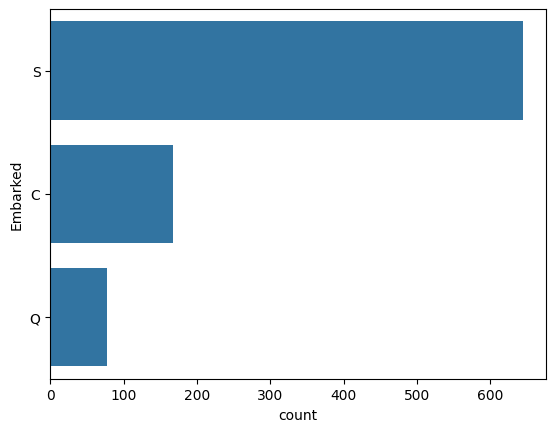

In [20]:
sns.countplot(df['Embarked'])

### (b) Bar chart and Pie chart with Percentage

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

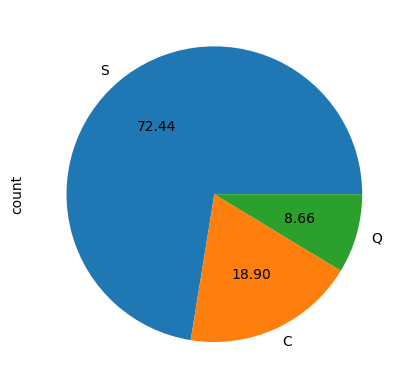

In [33]:
#df['Survived'].value_counts().plot(kind='bar')
df['Embarked'].value_counts().plot(kind='pie', autopct='%.2f')
df['Survived'].value_counts()
df['Embarked'].value_counts()

# Numerical Data : 

### (a) Histogram : 

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

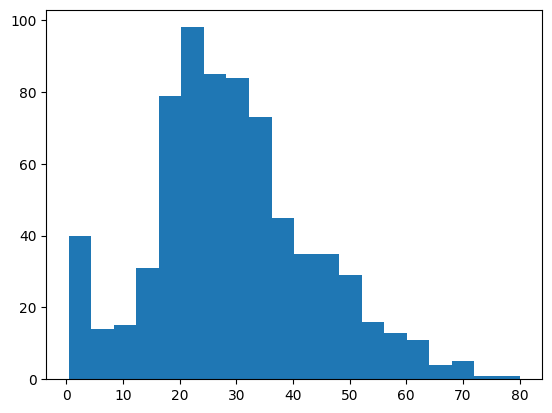

In [42]:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=20)


### (b) Distplot : 

C:\Users\Ayush\AppData\Local\Temp\ipykernel_18256\158010599.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']) # pdf (Probability Density Function)


<Axes: xlabel='Age', ylabel='Density'>

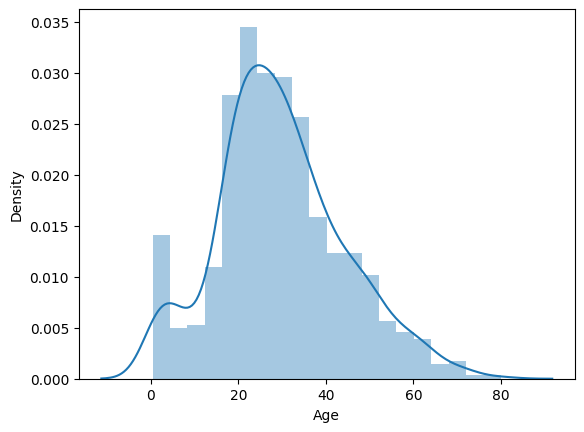

In [51]:
sns.distplot(df['Age']) # pdf (Probability Density Function)

### (c) Boxplot : 

<Axes: ylabel='Age'>

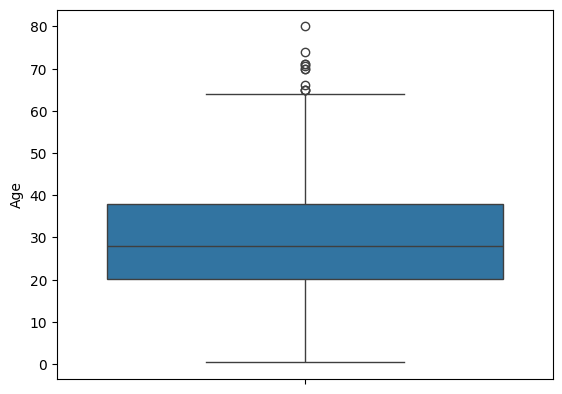

In [53]:
sns.boxplot(df['Age'])

### Min, Max, Mean, skew : 

In [56]:
df['Age'].min()

np.float64(0.42)

In [58]:
df['Age'].max()

np.float64(80.0)

In [59]:
df['Age'].mean()

np.float64(29.69911764705882)

In [61]:
df['Age'].skew()

np.float64(0.38910778230082704)